# Data Cleaning

# Data Cleaning For DA
=>Hadling Missing Data

=>standardizing data formats

=>filter unwanted outliers

=>handling duplicates

In [210]:
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

In [211]:
dataset = pd.read_csv('car_price.csv')
dataset.head(1)


,Column1,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats


In [212]:
dataset.shape #to find overall data(numberof rows,number of columns)

(5512, 10)

In [213]:
dataset.info() #to check the datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Column1              5512 non-null   int64  
 1   car_name             5512 non-null   object 
 2   car_prices_in_rupee  5507 non-null   object 
 3   kms_driven           5510 non-null   object 
 4   fuel_type            5508 non-null   object 
 5   transmission         5509 non-null   object 
 6   ownership            5510 non-null   object 
 7   manufacture          5510 non-null   float64
 8   engine               5510 non-null   object 
 9   Seats                5510 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 430.8+ KB


In [214]:
#Hadling Missing Data

dataset.isnull() #to find missing data if false=>there is a values ,but if true=>there is a missing content

,Column1,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5507,False,False,False,False,False,False,False,False,False,False
5508,False,False,False,False,False,False,False,False,False,False
5509,False,False,False,False,False,False,False,False,False,False
5510,False,False,False,False,False,False,False,False,False,False


In [215]:
dataset.isnull().sum() #it will give which column has missing content ,like how many rows has missing content in particular column

Column1                0
car_name               0
car_prices_in_rupee    5
kms_driven             2
fuel_type              4
transmission           3
ownership              2
manufacture            2
engine                 2
Seats                  2
dtype: int64

In [216]:
(dataset.isnull().sum()/dataset.shape[0])*100 #to see how many percentage of data is missing in particular column 

Column1                0.000000
car_name               0.000000
car_prices_in_rupee    0.090711
kms_driven             0.036284
fuel_type              0.072569
transmission           0.054427
ownership              0.036284
manufacture            0.036284
engine                 0.036284
Seats                  0.036284
dtype: float64

In [217]:
#remove the missing data
dataset.dropna(inplace=True)

In [218]:
dataset.isnull().sum()

Column1                0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

# problems with car_name

In [219]:
#to get car_name rows value
dataset['car_name']

0       Jeep Compass 2.0 Longitude Option BSIV
1                 Renault Duster RXZ Turbo CVT
2                           Toyota Camry 2.5 G
3                            Honda Jazz VX CVT
4             Volkswagen Polo 1.2 MPI Highline
                         ...                  
5507                   BMW X1 sDrive 20d xLine
5508                     BMW M Series M4 Coupe
5509                Jaguar XF 2.2 Litre Luxury
5510                        BMW 7 Series 730Ld
5511                 BMW 5 Series 520d M Sport
Name: car_name, Length: 5491, dtype: object

In [220]:
#to get car_name rows value at [0]index
dataset['car_name'][0]

'Jeep Compass 2.0 Longitude Option BSIV'

In [221]:
#for single value
x=dataset['car_name'][0]
x[:x.index(" ")]

'Jeep'

In [222]:
#for whole column get company name of car
def company_name(x):
    return x[:x.index(" ")]

In [223]:
dataset['car_name'].apply(company_name)

0             Jeep
1          Renault
2           Toyota
3            Honda
4       Volkswagen
           ...    
5507           BMW
5508           BMW
5509        Jaguar
5510           BMW
5511           BMW
Name: car_name, Length: 5491, dtype: object

In [224]:

dataset['company_name']=dataset['car_name'].apply(company_name)

In [225]:
dataset.head(1)

,Column1,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats,Jeep


In [226]:
def car_name(x):
    return x[x.index(" ")+1:]

In [227]:

dataset['car_name']=dataset['car_name'].apply(car_name)

In [144]:
dataset.head(1)

,Column1,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,0,Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats,Jeep


# problems with car_prices_in_rupee

In [228]:
dataset['car_prices_in_rupee']

0       10.03 Lakh
1       12.83 Lakh
2       16.40 Lakh
3        7.77 Lakh
4        5.15 Lakh
           ...    
5507    28.90 Lakh
5508    64.90 Lakh
5509    13.75 Lakh
5510    29.90 Lakh
5511    31.90 Lakh
Name: car_prices_in_rupee, Length: 5491, dtype: object

In [229]:

#35,000 ,28.90 Lakh ['28.90','Lakh'], 1.02 Crore ['1.02','Crore']


In [230]:
dataset['car_prices_in_rupee']=dataset['car_prices_in_rupee'].str.replace(',','') ##35,000 removing comma to nothing so we can have pure data or numbers without comma

In [231]:
#for understanding
l='28.90 Lakh'
a=l.split(' ')
print(a)
print(a[0])
print(a[1])
print(round(float(a[0])*100000,1))

['28.90', 'Lakh']
28.90
Lakh
2890000.0


In [232]:

def rupee_change(x):
    p= x.split(' ')
    try:
        if p[1] == 'Lakh':
            return str(round(float(p[0])*100000,1))
        elif p[1] == 'Crore':
            return str(round(float(p[0])*10000000,1))
    except:
        return x

In [233]:
dataset['car_prices_in_rupee'].apply(rupee_change)

0       1003000.0
1       1283000.0
2       1640000.0
3        777000.0
4        515000.0
          ...    
5507    2890000.0
5508    6490000.0
5509    1375000.0
5510    2990000.0
5511    3190000.0
Name: car_prices_in_rupee, Length: 5491, dtype: object

In [234]:
dataset['car_prices_in_rupee']=dataset['car_prices_in_rupee'].apply(rupee_change)

In [235]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5491 entries, 0 to 5511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Column1              5491 non-null   int64  
 1   car_name             5491 non-null   object 
 2   car_prices_in_rupee  5368 non-null   object 
 3   kms_driven           5491 non-null   object 
 4   fuel_type            5491 non-null   object 
 5   transmission         5491 non-null   object 
 6   ownership            5491 non-null   object 
 7   manufacture          5491 non-null   float64
 8   engine               5491 non-null   object 
 9   Seats                5491 non-null   object 
 10  company_name         5491 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 643.8+ KB


In [236]:
#to change datatype
dataset['car_prices_in_rupee'].astype('float')

0       1003000.0
1       1283000.0
2       1640000.0
3        777000.0
4        515000.0
          ...    
5507    2890000.0
5508    6490000.0
5509    1375000.0
5510    2990000.0
5511    3190000.0
Name: car_prices_in_rupee, Length: 5491, dtype: float64

In [237]:
dataset['car_prices_in_rupee']=dataset['car_prices_in_rupee'].astype('float')

In [238]:
dataset.head(5)

,Column1,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,0,Compass 2.0 Longitude Option BSIV,1003000.0,"86,226 kms",Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats,Jeep
1,1,Duster RXZ Turbo CVT,1283000.0,"13,248 kms",Petrol,Automatic,1st Owner,2021.0,1330 cc,5 Seats,Renault
2,2,Camry 2.5 G,1640000.0,"60,343 kms",Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats,Toyota
3,3,Jazz VX CVT,777000.0,"26,696 kms",Petrol,Automatic,1st Owner,2018.0,1199 cc,5 Seats,Honda
4,4,Polo 1.2 MPI Highline,515000.0,"69,414 kms",Petrol,Manual,1st Owner,2016.0,1199 cc,5 Seats,Volkswagen


# problems with kms_driven

In [239]:
dataset['kms_driven']=dataset['kms_driven'].str.replace(',','')
dataset['kms_driven']=dataset['kms_driven'].str.replace('kms','')

In [240]:
dataset['kms_driven'].astype('int64')

0       86226
1       13248
2       60343
3       26696
4       69414
        ...  
5507    45000
5508    29000
5509    90000
5510    79000
5511    42000
Name: kms_driven, Length: 5491, dtype: int64

# problems with engine

In [241]:

dataset['engine']=dataset['engine'].str.replace(' cc','')
dataset['engine'].astype('int64')

0       1956
1       1330
2       2494
3       1199
4       1199
        ... 
5507    2995
5508    1968
5509    2755
5510    2967
5511    1991
Name: engine, Length: 5491, dtype: int64

# problems with Seats

In [242]:
dataset['Seats']=dataset['Seats'].str.replace(' Seats','')
dataset['Seats'].astype('int64')

0       5
1       5
2       5
3       5
4       5
       ..
5507    7
5508    5
5509    5
5510    6
5511    5
Name: Seats, Length: 5491, dtype: int64

# problems with manufacture

In [243]:
pd.to_datetime(dataset['manufacture'])

0      1970-01-01 00:00:00.000002017
1      1970-01-01 00:00:00.000002021
2      1970-01-01 00:00:00.000002016
3      1970-01-01 00:00:00.000002018
4      1970-01-01 00:00:00.000002016
                    ...             
5507   1970-01-01 00:00:00.000002018
5508   1970-01-01 00:00:00.000002015
5509   1970-01-01 00:00:00.000002013
5510   1970-01-01 00:00:00.000002015
5511   1970-01-01 00:00:00.000002017
Name: manufacture, Length: 5491, dtype: datetime64[ns]

In [244]:
dataset['manufacture']=pd.to_datetime(dataset['manufacture'])

In [245]:
dataset.head(5)

,Column1,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,0,Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,1970-01-01 00:00:00.000002017,1956,5,Jeep
1,1,Duster RXZ Turbo CVT,1283000.0,13248,Petrol,Automatic,1st Owner,1970-01-01 00:00:00.000002021,1330,5,Renault
2,2,Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1st Owner,1970-01-01 00:00:00.000002016,2494,5,Toyota
3,3,Jazz VX CVT,777000.0,26696,Petrol,Automatic,1st Owner,1970-01-01 00:00:00.000002018,1199,5,Honda
4,4,Polo 1.2 MPI Highline,515000.0,69414,Petrol,Manual,1st Owner,1970-01-01 00:00:00.000002016,1199,5,Volkswagen


# Data Cleaning For Machine Learning
=>Hadling Missing Data <-> encodinf categorical variables

=>outlire detection and hadling <-> handling duplicates

=>data scaling & transformation <-> dealing with inconsist data

In [246]:
from sklearn.preprocessing import LabelEncoder,StandardScaler 

# car_name

In [247]:
car_name_en =LabelEncoder()
car_name_en.fit_transform(dataset['car_name'])

array([ 426,  509,  290, ..., 1711,   25,   13])

In [248]:
dataset['car_name']=car_name_en.fit_transform(dataset['car_name'])

In [249]:
dataset.head(5)

,Column1,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,0,426,1003000.0,86226,Diesel,Manual,1st Owner,1970-01-01 00:00:00.000002017,1956,5,Jeep
1,1,509,1283000.0,13248,Petrol,Automatic,1st Owner,1970-01-01 00:00:00.000002021,1330,5,Renault
2,2,290,1640000.0,60343,Petrol,Automatic,1st Owner,1970-01-01 00:00:00.000002016,2494,5,Toyota
3,3,911,777000.0,26696,Petrol,Automatic,1st Owner,1970-01-01 00:00:00.000002018,1199,5,Honda
4,4,1093,515000.0,69414,Petrol,Manual,1st Owner,1970-01-01 00:00:00.000002016,1199,5,Volkswagen


# fuel_type

In [250]:
fuel_type_en =LabelEncoder()
fuel_type_en.fit_transform(dataset['fuel_type'])

array([1, 4, 4, ..., 1, 1, 1])

In [251]:
dataset['fuel_type']=fuel_type_en.fit_transform(dataset['fuel_type'])

In [252]:
dataset.head(5)

,Column1,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,0,426,1003000.0,86226,1,Manual,1st Owner,1970-01-01 00:00:00.000002017,1956,5,Jeep
1,1,509,1283000.0,13248,4,Automatic,1st Owner,1970-01-01 00:00:00.000002021,1330,5,Renault
2,2,290,1640000.0,60343,4,Automatic,1st Owner,1970-01-01 00:00:00.000002016,2494,5,Toyota
3,3,911,777000.0,26696,4,Automatic,1st Owner,1970-01-01 00:00:00.000002018,1199,5,Honda
4,4,1093,515000.0,69414,4,Manual,1st Owner,1970-01-01 00:00:00.000002016,1199,5,Volkswagen


# transmission

In [253]:
transmission_en =LabelEncoder()
transmission_en.fit_transform(dataset['transmission'])

array([1, 0, 0, ..., 0, 0, 0])

In [254]:
dataset['transmission']=transmission_en.fit_transform(dataset['transmission'])

In [255]:
dataset.head(5)

,Column1,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,0,426,1003000.0,86226,1,1,1st Owner,1970-01-01 00:00:00.000002017,1956,5,Jeep
1,1,509,1283000.0,13248,4,0,1st Owner,1970-01-01 00:00:00.000002021,1330,5,Renault
2,2,290,1640000.0,60343,4,0,1st Owner,1970-01-01 00:00:00.000002016,2494,5,Toyota
3,3,911,777000.0,26696,4,0,1st Owner,1970-01-01 00:00:00.000002018,1199,5,Honda
4,4,1093,515000.0,69414,4,1,1st Owner,1970-01-01 00:00:00.000002016,1199,5,Volkswagen


# ownership

In [256]:
ownership_en =LabelEncoder()
ownership_en.fit_transform(dataset['ownership'])

array([1, 1, 1, ..., 2, 3, 2])

In [257]:
dataset['ownership']=ownership_en.fit_transform(dataset['ownership'])

In [258]:
dataset.head(5)

,Column1,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,0,426,1003000.0,86226,1,1,1,1970-01-01 00:00:00.000002017,1956,5,Jeep
1,1,509,1283000.0,13248,4,0,1,1970-01-01 00:00:00.000002021,1330,5,Renault
2,2,290,1640000.0,60343,4,0,1,1970-01-01 00:00:00.000002016,2494,5,Toyota
3,3,911,777000.0,26696,4,0,1,1970-01-01 00:00:00.000002018,1199,5,Honda
4,4,1093,515000.0,69414,4,1,1,1970-01-01 00:00:00.000002016,1199,5,Volkswagen


# manufacture

In [259]:
dataset['manufacture']

0      1970-01-01 00:00:00.000002017
1      1970-01-01 00:00:00.000002021
2      1970-01-01 00:00:00.000002016
3      1970-01-01 00:00:00.000002018
4      1970-01-01 00:00:00.000002016
                    ...             
5507   1970-01-01 00:00:00.000002018
5508   1970-01-01 00:00:00.000002015
5509   1970-01-01 00:00:00.000002013
5510   1970-01-01 00:00:00.000002015
5511   1970-01-01 00:00:00.000002017
Name: manufacture, Length: 5491, dtype: datetime64[ns]

In [260]:
dataset['manufacture_year']=dataset['manufacture'].dt.year

In [261]:
dataset.head(5)

,Column1,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name,manufacture_year
0,0,426,1003000.0,86226,1,1,1,1970-01-01 00:00:00.000002017,1956,5,Jeep,1970
1,1,509,1283000.0,13248,4,0,1,1970-01-01 00:00:00.000002021,1330,5,Renault,1970
2,2,290,1640000.0,60343,4,0,1,1970-01-01 00:00:00.000002016,2494,5,Toyota,1970
3,3,911,777000.0,26696,4,0,1,1970-01-01 00:00:00.000002018,1199,5,Honda,1970
4,4,1093,515000.0,69414,4,1,1,1970-01-01 00:00:00.000002016,1199,5,Volkswagen,1970


# company_name

In [262]:
company_name_en =LabelEncoder()
company_name_en.fit_transform(dataset['company_name'])

array([12, 26, 29, ..., 11,  1,  1])

In [263]:
dataset['company_name']=company_name_en.fit_transform(dataset['company_name'])

In [264]:
dataset.head(5)

,Column1,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name,manufacture_year
0,0,426,1003000.0,86226,1,1,1,1970-01-01 00:00:00.000002017,1956,5,12,1970
1,1,509,1283000.0,13248,4,0,1,1970-01-01 00:00:00.000002021,1330,5,26,1970
2,2,290,1640000.0,60343,4,0,1,1970-01-01 00:00:00.000002016,2494,5,29,1970
3,3,911,777000.0,26696,4,0,1,1970-01-01 00:00:00.000002018,1199,5,8,1970
4,4,1093,515000.0,69414,4,1,1,1970-01-01 00:00:00.000002016,1199,5,30,1970


In [265]:
#removing unnecessary data
dataset.drop(columns=['manufacture'],inplace=True)

In [266]:
dataset.head(5)

,Column1,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,company_name,manufacture_year
0,0,426,1003000.0,86226,1,1,1,1956,5,12,1970
1,1,509,1283000.0,13248,4,0,1,1330,5,26,1970
2,2,290,1640000.0,60343,4,0,1,2494,5,29,1970
3,3,911,777000.0,26696,4,0,1,1199,5,8,1970
4,4,1093,515000.0,69414,4,1,1,1199,5,30,1970


# removing outliners for each column
if have more outliners dont remove it ,itwill loose data

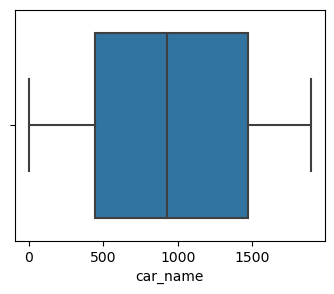

In [267]:
plt.figure(figsize=(4,3))
sns.boxplot(x='car_name',data=dataset)
plt.show()

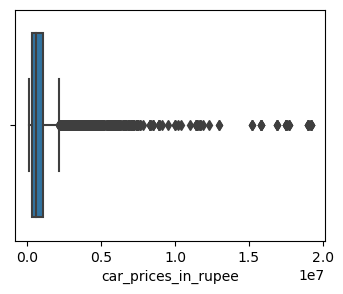

In [268]:
plt.figure(figsize=(4,3))
sns.boxplot(x='car_prices_in_rupee',data=dataset)
plt.show()

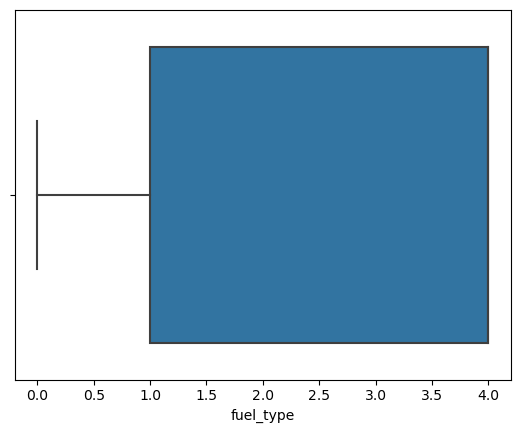

In [269]:

sns.boxplot(x='fuel_type',data=dataset)
plt.show()

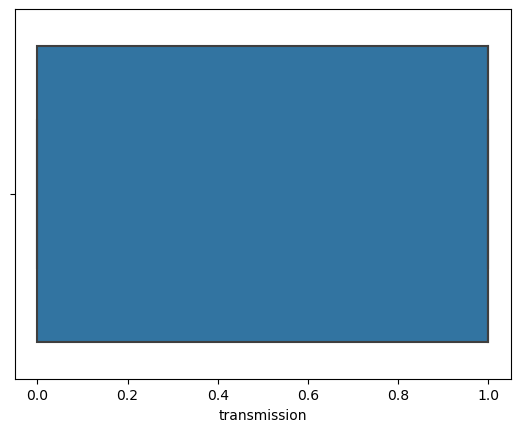

In [270]:
sns.boxplot(x='transmission',data=dataset)
plt.show()

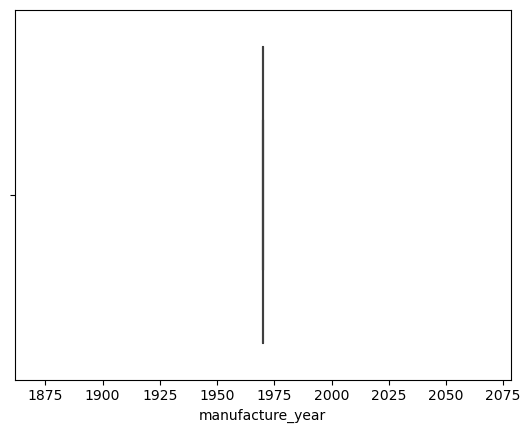

In [271]:
sns.boxplot(x='manufacture_year',data=dataset)
plt.show()

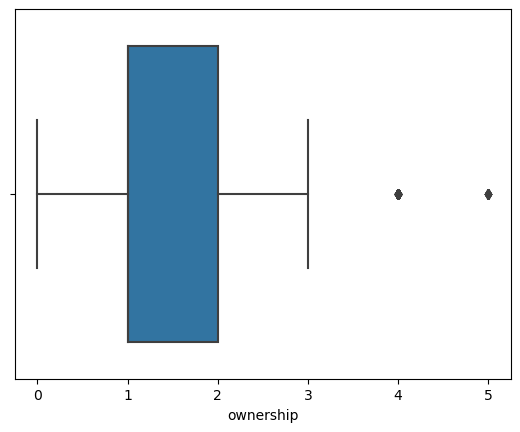

In [272]:
sns.boxplot(x='ownership',data=dataset)
plt.show()

In [ ]:
#removing outliers for ownership 
#outliers if=>numerical data -->if you want, remove it .else if categorical data->dont perform outliers
#thats only for example dont remove for ownership when you’re doing actual project just do it for data like engine

In [273]:
q1=  np.quantile(dataset['ownership'],0.25)
q3=  np.quantile(dataset['ownership'],0.75)

In [274]:
q1,q3

(1.0, 2.0)

In [275]:
iqr=q3-q1

In [276]:
min_r = q1 -(1.5*iqr)
max_r =q3+(1.5*iqr)

In [277]:
min_r,max_r

(-0.5, 3.5)

In [278]:
dataset[dataset['ownership']<=max_r]

,Column1,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,company_name,manufacture_year
0,0,426,1003000.0,86226,1,1,1,1956,5,12,1970
1,1,509,1283000.0,13248,4,0,1,1330,5,26,1970
2,2,290,1640000.0,60343,4,0,1,2494,5,29,1970
3,3,911,777000.0,26696,4,0,1,1199,5,8,1970
4,4,1093,515000.0,69414,4,1,1,1199,5,30,1970
...,...,...,...,...,...,...,...,...,...,...,...
5507,5507,1679,2890000.0,45000,1,0,1,2995,7,1,1970
5508,5508,976,6490000.0,29000,4,0,2,1968,5,1,1970
5509,5509,1711,1375000.0,90000,1,0,2,2755,5,11,1970
5510,5510,25,2990000.0,79000,1,0,3,2967,6,1,1970


In [279]:
dataset=dataset[dataset['ownership']<=max_r]

In [280]:
dataset.shape #before this clustering in (5465,10)

(5395, 11)

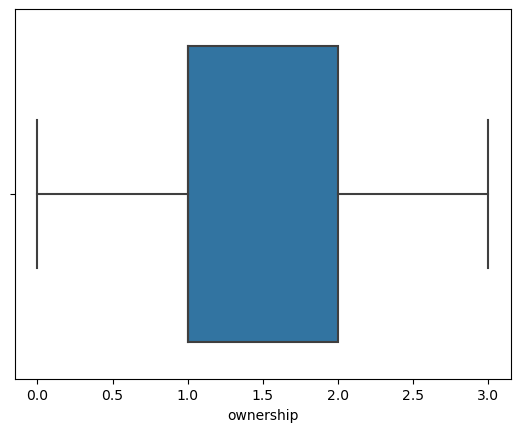

In [281]:
sns.boxplot(x='ownership',data=dataset)
plt.show() #now we can see it dont has outliers #its only for example dont do it for this data(ownership)

In [282]:
#scaling
#in supervised Ml scaling will be done only for input data not output data
#in nonsupervised ML scaling will done on entire data

In [283]:
ss = StandardScaler()
ss.fit_transform(dataset)

array([[-1.73814817, -0.91651733, -0.09950549, ..., -0.35004635,
        -0.42700724,  0.        ],
       [-1.73751894, -0.77248509,  0.04049931, ..., -0.35004635,
         1.29529633,  0.        ],
       [-1.7368897 , -1.15252195,  0.21900542, ..., -0.35004635,
         1.66436139,  0.        ],
       ...,
       [ 1.72830447,  1.31337931,  0.08650088, ..., -0.35004635,
        -0.55002892,  0.        ],
       [ 1.72893371, -1.61238391,  0.89402854, ...,  1.03651758,
        -1.78024576,  0.        ],
       [ 1.72956294, -1.63320784,  0.99403196, ..., -0.35004635,
        -1.78024576,  0.        ]])

In [284]:
pd.DataFrame(ss.fit_transform(dataset),columns=dataset.columns)

,Column1,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,company_name,manufacture_year
0,-1.738148,-0.916517,-0.099505,0.569982,-1.066920,0.630610,-0.615128,0.727089,-0.350046,-0.427007,0.0
1,-1.737519,-0.772485,0.040499,-1.187905,0.920203,-1.585767,-0.615128,-0.352090,-0.350046,1.295296,0.0
2,-1.736890,-1.152522,0.219005,-0.053485,0.920203,-1.585767,-0.615128,1.654563,-0.350046,1.664361,0.0
3,-1.736260,-0.074883,-0.212509,-0.863971,0.920203,-1.585767,-0.615128,-0.577925,-0.350046,-0.919094,0.0
4,-1.735631,0.240947,-0.343514,0.165016,0.920203,0.630610,-0.615128,-0.577925,-0.350046,1.787383,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5390,1.727046,1.257849,0.844027,-0.423066,-1.066920,-1.585767,-0.615128,2.518252,2.423082,-1.780246,0.0
5391,1.727675,0.037913,2.644088,-0.808472,0.920203,-1.585767,1.030195,0.747777,-0.350046,-1.780246,0.0
5392,1.728304,1.313379,0.086501,0.660889,-1.066920,-1.585767,1.030195,2.104509,-0.350046,-0.550029,0.0
5393,1.728934,-1.612384,0.894029,0.395922,-1.066920,-1.585767,2.675519,2.469982,1.036518,-1.780246,0.0


In [285]:
new_data=pd.DataFrame(ss.fit_transform(dataset),columns=dataset.columns)

In [286]:
new_data.head(5)

,Column1,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,company_name,manufacture_year
0,-1.738148,-0.916517,-0.099505,0.569982,-1.066920,0.630610,-0.615128,0.727089,-0.350046,-0.427007,0.0
1,-1.737519,-0.772485,0.040499,-1.187905,0.920203,-1.585767,-0.615128,-0.352090,-0.350046,1.295296,0.0
2,-1.736890,-1.152522,0.219005,-0.053485,0.920203,-1.585767,-0.615128,1.654563,-0.350046,1.664361,0.0
3,-1.736260,-0.074883,-0.212509,-0.863971,0.920203,-1.585767,-0.615128,-0.577925,-0.350046,-0.919094,0.0
4,-1.735631,0.240947,-0.343514,0.165016,0.920203,0.630610,-0.615128,-0.577925,-0.350046,1.787383,0.0
